Read data

In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
dados_table <- read.table("sim40.nor_exp",header=FALSE)
colnames(dados_table) <- as.character(dados_table[1, ])
rownames(dados_table)<-dados_table[,1]
# print(head(dados))
dados_table<-dados_table[,-1]
dados_table<-dados_table[-1,]
# dados_table <- dados_table[-1, ] # retira a primeira linha que virou as colunas
# # 1. Remover colunas que contêm apenas NA
# dados <- dados %>% select(where(~ any(!is.na(.))))
head(dados_table)


,IID,FID,MID,SEX,AFF,DE,eQTM_DE,eQTM_DE.1,eQTM_DE.2,EE,⋯,EE.11990,EE.11991,EE.11992,EE.11993,EE.11994,EE.11995,EE.11996,EE.11997,EE.11998,EE.11999
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
DCASES20,1,0,0,1,2,2.66339,-1.34009,-1.76241,-0.672252,-0.577775,⋯,1.20036,-1.03676,0.544658,1.56057,-0.298322,1.74851,-0.682949,0.00668907,1.32782,1.38499
DCASES33,1,0,0,2,2,0.474384,-1.86177,-1.37061,-1.2634,-1.33573,⋯,-0.155271,0.00238029,-0.481245,0.633662,-0.370012,-0.758338,-0.00022305,-0.594831,0.773659,-0.925323
DCASES43,1,0,0,2,2,0.29254,-1.84969,-1.65761,-0.120249,-0.445238,⋯,-1.17334,-0.686716,-0.260192,-1.05207,-0.41184,-0.440717,-0.166139,0.0311801,-0.578997,0.566657
DCASES112,1,0,0,1,2,0.359437,-1.87245,-0.0630323,-2.09576,-0.784027,⋯,-0.337672,-0.930048,0.119448,-0.395364,-0.593671,-0.892995,-0.566505,-0.604854,0.374614,0.939243
DCASES123,1,0,0,2,2,0.85526,-1.8705,0.144212,-1.93037,-0.105983,⋯,-0.264068,3.79596,0.240018,-1.21078,0.581054,0.377331,1.72558,-0.329641,-0.470071,0.772792
DCASES157,1,0,0,2,2,2.07239,-0.927744,-2.27531,-2.22307,0.38711,⋯,-1.25027,-0.909326,0.672056,2.36087,-0.247829,1.37464,-0.74401,-0.944056,0.0615742,1.7376


In [ ]:
# Suponha que 'dados' seja uma tabela
dados <- as.data.frame.matrix(dados_table)

# Agora você pode usar o data.frame normalmente
dados$grupo <- ifelse(grepl("CASE", rownames(dados)), 1,
                      ifelse(grepl("CONTROL", rownames(dados)), 0, NA))
col_aux <- colnames(dados)
for (col in col_aux[6:(length(col_aux)-1)]) {
  dados[[col]] <- as.numeric(as.character(dados[[col]]))
}
head(dados)

,IID,FID,MID,SEX,AFF,DE,eQTM_DE,eQTM_DE.1,eQTM_DE.2,EE,⋯,EE.11991,EE.11992,EE.11993,EE.11994,EE.11995,EE.11996,EE.11997,EE.11998,EE.11999,grupo
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DCASES20,1,0,0,1,2,2.663390,-1.340090,-1.7624100,-0.672252,-0.577775,⋯,-1.03676000,0.544658,1.560570,-0.298322,1.748510,-0.68294900,0.00668907,1.3278200,1.384990,1
DCASES33,1,0,0,2,2,0.474384,-1.861770,-1.3706100,-1.263400,-1.335730,⋯,0.00238029,-0.481245,0.633662,-0.370012,-0.758338,-0.00022305,-0.59483100,0.7736590,-0.925323,1
DCASES43,1,0,0,2,2,0.292540,-1.849690,-1.6576100,-0.120249,-0.445238,⋯,-0.68671600,-0.260192,-1.052070,-0.411840,-0.440717,-0.16613900,0.03118010,-0.5789970,0.566657,1
DCASES112,1,0,0,1,2,0.359437,-1.872450,-0.0630323,-2.095760,-0.784027,⋯,-0.93004800,0.119448,-0.395364,-0.593671,-0.892995,-0.56650500,-0.60485400,0.3746140,0.939243,1
DCASES123,1,0,0,2,2,0.855260,-1.870500,0.1442120,-1.930370,-0.105983,⋯,3.79596000,0.240018,-1.210780,0.581054,0.377331,1.72558000,-0.32964100,-0.4700710,0.772792,1
DCASES157,1,0,0,2,2,2.072390,-0.927744,-2.2753100,-2.223070,0.387110,⋯,-0.90932600,0.672056,2.360870,-0.247829,1.374640,-0.74401000,-0.94405600,0.0615742,1.737600,1


In [ ]:
dados.matriz <- as.matrix(dados[,7:ncol(dados)-1])
labels <- dados[,ncol(dados)]

## Primeira via

In [ ]:
col_means <- colMeans(dados.matriz)
print(col_means)

           DE       eQTM_DE     eQTM_DE.1     eQTM_DE.2            EE 
 8.638398e-01  1.087011e+00  1.139016e+00  1.118647e+00 -4.766199e-02 
         EE.1          EE.2          EE.3          EE.4          EE.5 
-2.538148e-01 -6.667572e-02 -1.942101e-01  5.150989e-02  3.974526e-01 
         EE.6          EE.7          EE.8          EE.9         EE.10 
 3.660789e-01  3.657571e-01  2.861099e-01  4.235203e-01  3.766607e-02 
        EE.11         EE.12         EE.13         EE.14         EE.15 
 1.713615e-01 -4.114575e-01  1.327435e-01  4.095118e-01 -3.312503e-02 
        EE.16         EE.17         EE.18         EE.19         EE.20 
 3.853489e-01 -4.014678e-02 -1.919696e-02  3.732399e-02 -3.224234e-01 
        EE.21         EE.22         EE.23         EE.24         EE.25 
-1.038917e-01  3.785179e-01  8.740670e-02 -2.560535e-01 -1.650425e-01 
        EE.26         EE.27         EE.28         EE.29         EE.30 
-3.076261e-01 -2.760417e-01 -6.223424e-02 -4.843125e-01  3.609604e-02 
      

$A = UDV^{\top}$<br>


In [ ]:
svu<-svd(scale(dados.matriz[,1:100], center = TRUE, scale = FALSE))

In [ ]:
cat(dim(svu$u))
print('\n')
cat(dim(svu$v))
print('\n')
cat(dim(dados.matriz))

1000 100[1] "\n"
100 100[1] "\n"
1000 12004

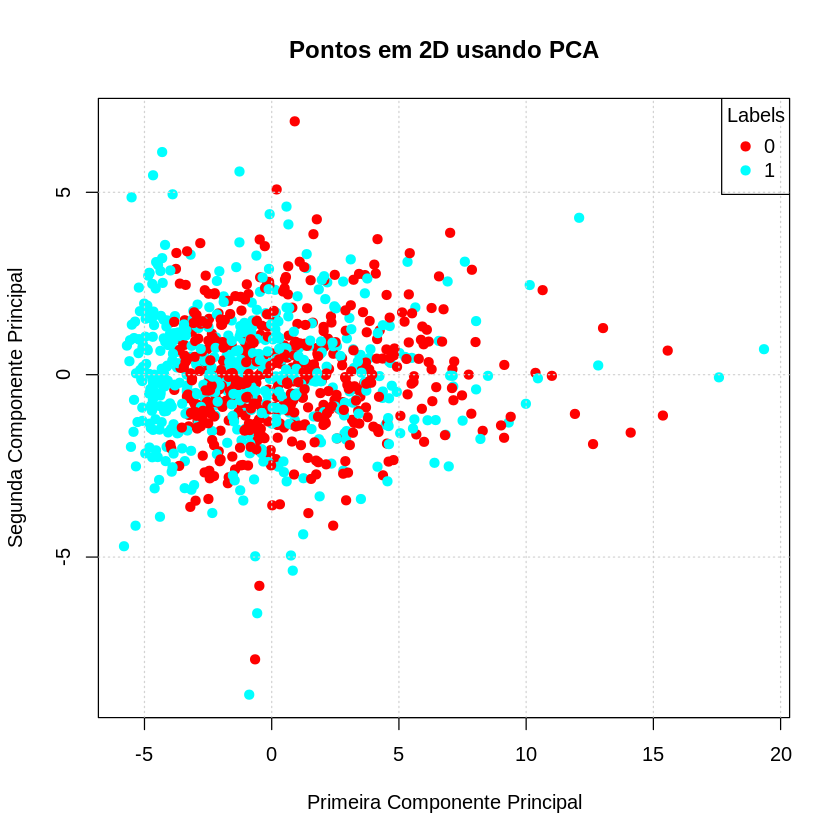

In [ ]:
labels <- as.factor(labels)

scores <- svu$u[, 1:2] %*% diag(svu$d[1:2])

# Gerando uma paleta de cores para cada nível dos labels
cores <- rainbow(length(levels(labels)))

# Associando cada label a uma cor
cores_dados <- cores[as.numeric(labels)]

# Crie o gráfico bidimensional com cores baseadas nos labels
plot(scores[, 1], scores[, 2],
     xlab = "Primeira Componente Principal",
     ylab = "Segunda Componente Principal",
     main = "Pontos em 2D usando PCA",
     pch = 19, col = cores_dados)
grid()

# Adicione uma legenda (opcional)
legend("topright", legend = levels(labels), col = cores, pch = 19, title = "Labels")

V_i da matriz de correlação - autovetor-,
V_{ij}^2 é a porcentagem que a variavel j explica

In [ ]:
load_pca<-svu$v[,1:2]

In [ ]:
colnames(dados.matriz)

[1] "DE"        "eQTM_DE"   "eQTM_DE.1" "eQTM_DE.2" "EE"        "EE.1"     
    [7] "EE.2"      "EE.3"      "EE.4"      "EE.5"      "EE.6"      "EE.7"     
   [13] "EE.8"      "EE.9"      "EE.10"     "EE.11"     "EE.12"     "EE.13"    
   [19] "EE.14"     "EE.15"     "EE.16"     "EE.17"     "EE.18"     "EE.19"    
   [25] "EE.20"     "EE.21"     "EE.22"     "EE.23"     "EE.24"     "EE.25"    
   [31] "EE.26"     "EE.27"     "EE.28"     "EE.29"     "EE.30"     "EE.31"    
   [37] "EE.32"     "EE.33"     "EE.34"     "EE.35"     "EE.36"     "EE.37"    
   [43] "EE.38"     "EE.39"     "EE.40"     "EE.41"     "EE.42"     "EE.43"    
   [49] "EE.44"     "EE.45"     "EE.46"     "EE.47"     "EE.48"     "EE.49"    
   [55] "EE.50"     "EE.51"     "EE.52"     "EE.53"     "EE.54"     "EE.55"    
   [61] "EE.56"     "EE.57"     "EE.58"     "EE.59"     "EE.60"     "EE.61"    
   [67] "EE.62"     "EE.63"     "EE.64"     "EE.65"     "EE.66"     "EE.67"    
   [73] "EE.68"     "EE.69"     "EE.70"     "EE.71"     "EE.72"     "EE.73"    
   [79] "EE.74"     "EE.75"     "EE.76"     "EE.77"     "EE.78"     "EE.79"    
   [85] "EE.80"     "EE.81"     "EE.82"     "EE.83"     "EE.84"     "EE.85"    
   [91] "EE.86"     "EE.87"     "EE.88"     "EE.89"     "EE.90"     "EE.91"    
   [97] "EE.92"     "EE.93"     "EE.94"     "EE.95"     "EE.96"     "EE.97"    
  [103] "EE.98"     "EE.99"     "EE.100"    "EE.101"    "EE.102"    "EE.103"   
  [109] "EE.104"    "EE.105"    "EE.106"    "EE.107"    "EE.108"    "EE.109"   
  [115] "EE.110"    "EE.111"    "EE.112"    "EE.113"    "EE.114"    "EE.115"   
  [121] "EE.116"    "EE.117"    "EE.118"    "EE.119"    "EE.120"    "EE.121"   
  [127] "EE.122"    "EE.123"    "EE.124"    "EE.125"    "EE.126"    "EE.127"   
  [133] "EE.128"    "EE.129"    "EE.130"    "EE.131"    "EE.132"    "EE.133"   
  [139] "EE.134"    "EE.135"    "EE.136"    "EE.137"    "EE.138"    "EE.139"   
  [145] "EE.140"    "EE.141"    "EE.142"    "EE.143"    "EE.144"    "EE.145"   
  [151] "EE.146"    "EE.147"    "EE.148"    "EE.149"    "EE.150"    "EE.151"   
  [157] "EE.152"    "EE.153"    "EE.154"    "EE.155"    "EE.156"    "EE.157"   
  [163] "EE.158"    "EE.159"    "EE.160"    "EE.161"    "EE.162"    "EE.163"   
  [169] "EE.164"    "EE.165"    "EE.166"    "EE.167"    "EE.168"    "EE.169"   
  [175] "EE.170"    "EE.171"    "EE.172"    "EE.173"    "EE.174"    "EE.175"   
  [181] "EE.176"    "EE.177"    "EE.178"    "EE.179"    "EE.180"    "EE.181"   
  [187] "EE.182"    "EE.183"    "EE.184"    "EE.185"    "EE.186"    "EE.187"   
  [193] "EE.188"    "EE.189"    "EE.190"    "EE.191"    "EE.192"    "EE.193"   
  [199] "EE.194"    "EE.195"    "EE.196"    "EE.197"    "EE.198"    "EE.199"   
  [205] "EE.200"    "EE.201"    "EE.202"    "EE.203"    "EE.204"    "EE.205"   
  [211] "EE.206"    "EE.207"    "EE.208"    "EE.209"    "EE.210"    "EE.211"   
  [217] "EE.212"    "EE.213"    "EE.214"    "EE.215"    "EE.216"    "EE.217"   
  [223] "EE.218"    "EE.219"    "EE.220"    "EE.221"    "EE.222"    "EE.223"   
  [229] "EE.224"    "EE.225"    "EE.226"    "EE.227"    "EE.228"    "EE.229"   
  [235] "EE.230"    "EE.231"    "EE.232"    "EE.233"    "EE.234"    "EE.235"   
  [241] "EE.236"    "EE.237"    "EE.238"    "EE.239"    "EE.240"    "EE.241"   
  [247] "EE.242"    "EE.243"    "EE.244"    "EE.245"    "EE.246"    "EE.247"   
  [253] "EE.248"    "EE.249"    "EE.250"    "EE.251"    "EE.252"    "EE.253"   
  [259] "EE.254"    "EE.255"    "EE.256"    "EE.257"    "EE.258"    "EE.259"   
  [265] "EE.260"    "EE.261"    "EE.262"    "EE.263"    "EE.264"    "EE.265"   
  [271] "EE.266"    "EE.267"    "EE.268"    "EE.269"    "EE.270"    "EE.271"   
  [277] "EE.272"    "EE.273"    "EE.274"    "EE.275"    "EE.276"    "EE.277"   
  [283] "EE.278"    "EE.279"    "EE.280"    "EE.281"    "EE.282"    "EE.283"   
  [289] "EE.284"    "EE.285"    "EE.286"    "EE.287"    "EE.288"    "EE.289"   
  [295] "EE.290"    "EE.291"    "EE.292"    "EE.293"    "EE.294"    "EE.295"   
  [3

In [ ]:
svu$v[,1:2]

-0.0204121712,0.012899709
0.3485402424,-0.003729390
0.3316289266,-0.007790132
0.3541926267,0.014070126
0.0131858740,-0.012837916
-0.0015720236,0.011125913
0.0138782183,0.006581546
0.0055810930,-0.007917517
-0.0001174371,-0.005742711
-0.0161667351,0.019824285
0.0124692129,0.005669495


In [ ]:
svu$d[1:2]^2/sum(svu$d^2)

[1] 0.09259625 0.02016591

In [ ]:
# cor.analysis <- cor(dados.matriz)
# vd<- eigen(cor.analysis)

## PCA direto


In [ ]:
dim(dados.matriz)

[1]  1000 12004

In [ ]:
# Realizando a PCA
pca_result <- prcomp(dados.matriz)

# Resumo dos resultados da PCA
summary(pca_result)

# Scores (projeção dos dados nas componentes principais)
scores <- pca_result$x
head(scores)  # Exibir os primeiros scores

# Vetores de carga (loadings)
loadings <- pca_result$rotation
head(loadings)

# Visualizar a variância explicada por cada componente
variancia_explicada <- pca_result$sdev^2 / sum(pca_result$sdev^2)
variancia_explicada


Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.43414 5.03230 5.02763 5.00594 5.00099 4.98835 4.98418
Proportion of Variance 0.00199 0.00171 0.00171 0.00169 0.00169 0.00168 0.00168
Cumulative Proportion  0.00199 0.00370 0.00541 0.00710 0.00879 0.01047 0.01214
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.97922 4.97383 4.96630 4.95774 4.95277 4.94517 4.94166
Proportion of Variance 0.00167 0.00167 0.00166 0.00166 0.00166 0.00165 0.00165
Cumulative Proportion  0.01382 0.01549 0.01715 0.01881 0.02046 0.02211 0.02376
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     4.93758 4.92888 4.92480 4.91720 4.90585 4.90286 4.89841
Proportion of Variance 0.00165 0.00164 0.00164 0.00163 0.00162 0.00162 0.00162
Cumulative Proportion  0.02541 0.02705 0.02868 0.03032 0.03194 0.03356 0.03518
                          

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
DCASES20,-6.4365029,-1.9163119,0.5026762,-3.975740,1.006071,-4.198847,3.647530,-14.0561067,9.0805986,-7.7724062,⋯,-1.9744904,0.5852268,-1.3448845,6.1365624,5.81893608,2.370159,1.4624641,-1.2830340,0.8334943,7.216450e-16
DCASES33,-6.1354928,0.6121158,-2.0163097,-3.772981,1.718783,2.947920,-2.472530,-3.9914080,-16.9851867,0.9507151,⋯,0.7035597,-1.9951230,-1.7453366,-0.5742965,-2.94140069,3.347485,3.0431993,3.7525291,2.4683422,-9.103829e-15
DCASES43,-5.7005308,-1.4915708,2.3059803,16.066504,5.548426,3.234042,3.240104,-10.1467741,-2.0596523,1.1331764,⋯,-1.6897515,0.2047310,-1.2349100,-2.6092802,-0.64559969,1.143961,2.9833721,-5.7909582,0.3935098,-9.714451e-17
DCASES112,-6.6924622,-3.7140649,3.2973890,5.232407,2.497676,-2.904463,7.342927,-0.6733508,-0.3783849,-1.8206672,⋯,0.6895144,2.6484051,0.4121662,-3.2712883,-0.08940394,1.707805,-0.1673209,2.8862383,-0.5458316,2.803313e-15
DCASES123,-0.8070561,-9.4774416,-0.4077101,3.482740,-5.010308,-5.719139,3.756277,0.1567914,-5.2198935,-7.3428900,⋯,-0.6975666,-3.0453556,2.5069905,2.6161152,-0.11543887,1.106720,1.0127881,0.1728688,2.6286734,-3.955170e-16
DCASES157,-8.0799611,-4.5988469,-0.8389141,-3.697987,-12.562764,-3.218125,1.052507,3.1510512,4.5080916,0.2221374,⋯,-3.1034406,2.4982718,3.5113091,-1.7008481,2.70235602,2.068877,-0.8208850,0.3011363,1.2382270,8.881784e-16


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
DE,-0.020412171,0.012899709,0.012354644,0.0090764140,-0.001704741,-0.0080042219,-0.008622803,0.015396925,-0.0021717586,-0.017408055,⋯,-0.014355326,0.005471863,0.001935578,0.012705128,1.843470e-04,-0.004033918,0.0190530510,-0.009229187,-0.015898581,-0.026126270
eQTM_DE,0.348540242,-0.003729390,-0.010906122,-0.0145258686,0.017227369,-0.0175590179,0.004859140,0.022078594,0.0099022190,0.033520409,⋯,0.005554031,0.001095119,0.007414513,-0.001996621,-4.117872e-03,-0.002541721,-0.0194904143,-0.003162451,-0.026584959,-0.013496657
eQTM_DE.1,0.331628927,-0.007790132,-0.015709537,-0.0114149752,0.003241884,-0.0122058472,-0.005877316,0.008783110,0.0008469282,0.015153696,⋯,-0.001560453,-0.002383435,-0.006162044,-0.018414675,9.894356e-05,0.009477192,-0.0005444263,0.009535776,-0.009118733,0.015750090
eQTM_DE.2,0.354192627,0.014070126,-0.008410062,0.0001212354,0.003177413,-0.0172327166,0.004114961,0.016854298,0.0130884139,0.005566645,⋯,0.007008422,-0.003166260,-0.008390711,-0.019048485,-7.001846e-03,-0.008790089,0.0095096870,-0.003126207,-0.008284604,0.058834226
EE,0.013185874,-0.012837916,0.010712291,0.0115396868,0.005441963,-0.0000228786,-0.004759715,0.006037108,-0.0015967810,0.008614078,⋯,0.002242499,-0.009490303,-0.010519567,0.010051563,1.169130e-02,-0.001754205,-0.0007554251,-0.008870644,-0.003507653,-0.005075593
EE.1,-0.001572024,0.011125913,-0.007416119,0.0008583375,-0.003984308,-0.0090302341,0.004120430,0.004540187,-0.0038347801,0.012306491,⋯,0.006138107,-0.009172708,-0.009612059,0.011343485,1.068104e-02,-0.003437885,-0.0002298533,-0.002068341,-0.002499382,0.013855477


[1] 1.992851e-03 1.709014e-03 1.705842e-03 1.691155e-03 1.687815e-03
   [6] 1.679295e-03 1.676489e-03 1.673154e-03 1.669530e-03 1.664477e-03
  [11] 1.658746e-03 1.655421e-03 1.650347e-03 1.648008e-03 1.645282e-03
  [16] 1.639495e-03 1.636778e-03 1.631731e-03 1.624205e-03 1.622231e-03
  [21] 1.619283e-03 1.613938e-03 1.612999e-03 1.609753e-03 1.606899e-03
  [26] 1.605953e-03 1.602002e-03 1.599933e-03 1.598741e-03 1.597917e-03
  [31] 1.593724e-03 1.591518e-03 1.588107e-03 1.585153e-03 1.583338e-03
  [36] 1.579720e-03 1.578500e-03 1.576474e-03 1.572457e-03 1.570787e-03
  [41] 1.568473e-03 1.564086e-03 1.562588e-03 1.560311e-03 1.557782e-03
  [46] 1.552384e-03 1.551133e-03 1.547189e-03 1.545898e-03 1.545237e-03
  [51] 1.543163e-03 1.542173e-03 1.538628e-03 1.536668e-03 1.535463e-03
  [56] 1.532992e-03 1.531749e-03 1.526827e-03 1.525284e-03 1.523783e-03
  [61] 1.520948e-03 1.518689e-03 1.516613e-03 1.515434e-03 1.514389e-03
  [66] 1.511584e-03 1.510142e-03 1.509496e-03 1.506116e-03 1.503107e-03
  [71] 1.500663e-03 1.499607e-03 1.497177e-03 1.493574e-03 1.491680e-03
  [76] 1.491579e-03 1.489188e-03 1.487773e-03 1.486342e-03 1.484873e-03
  [81] 1.481299e-03 1.480103e-03 1.477699e-03 1.476392e-03 1.475412e-03
  [86] 1.473774e-03 1.471805e-03 1.469775e-03 1.467942e-03 1.466107e-03
  [91] 1.465141e-03 1.463695e-03 1.460307e-03 1.459005e-03 1.456739e-03
  [96] 1.454135e-03 1.453037e-03 1.451163e-03 1.448135e-03 1.446347e-03
 [101] 1.444979e-03 1.444065e-03 1.443130e-03 1.441693e-03 1.441333e-03
 [106] 1.438605e-03 1.436991e-03 1.435427e-03 1.433835e-03 1.430507e-03
 [111] 1.428937e-03 1.427687e-03 1.427292e-03 1.423452e-03 1.422152e-03
 [116] 1.421417e-03 1.420846e-03 1.416457e-03 1.415987e-03 1.414156e-03
 [121] 1.412687e-03 1.410344e-03 1.407309e-03 1.406432e-03 1.404928e-03
 [126] 1.403538e-03 1.402825e-03 1.401262e-03 1.399311e-03 1.396522e-03
 [131] 1.394573e-03 1.392641e-03 1.392027e-03 1.391541e-03 1.390461e-03
 [136] 1.387801e-03 1.385589e-03 1.385060e-03 1.384229e-03 1.382776e-03
 [141] 1.380076e-03 1.377672e-03 1.374922e-03 1.373814e-03 1.373161e-03
 [146] 1.373052e-03 1.371448e-03 1.368659e-03 1.367603e-03 1.366896e-03
 [151] 1.365652e-03 1.362967e-03 1.362039e-03 1.360842e-03 1.360123e-03
 [156] 1.357739e-03 1.356570e-03 1.353847e-03 1.352291e-03 1.351152e-03
 [161] 1.350365e-03 1.350218e-03 1.349175e-03 1.346673e-03 1.345299e-03
 [166] 1.343564e-03 1.341143e-03 1.339465e-03 1.338261e-03 1.337513e-03
 [171] 1.334703e-03 1.333112e-03 1.331590e-03 1.330007e-03 1.328934e-03
 [176] 1.327732e-03 1.326700e-03 1.325733e-03 1.325248e-03 1.323444e-03
 [181] 1.321769e-03 1.320409e-03 1.319200e-03 1.317846e-03 1.316356e-03
 [186] 1.315568e-03 1.314083e-03 1.312198e-03 1.311327e-03 1.310112e-03
 [191] 1.308146e-03 1.307169e-03 1.305768e-03 1.303756e-03 1.303206e-03
 [196] 1.303077e-03 1.301253e-03 1.298360e-03 1.297574e-03 1.296297e-03
 [201] 1.294049e-03 1.291831e-03 1.291099e-03 1.290186e-03 1.288370e-03
 [206] 1.286838e-03 1.284800e-03 1.283579e-03 1.283534e-03 1.282281e-03
 [211] 1.281128e-03 1.278301e-03 1.277196e-03 1.277034e-03 1.275803e-03
 [216] 1.274845e-03 1.273053e-03 1.270947e-03 1.270132e-03 1.268360e-03
 [221] 1.268078e-03 1.267365e-03 1.265435e-03 1.264014e-03 1.262018e-03
 [226] 1.260965e-03 1.259547e-03 1.258835e-03 1.256477e-03 1.255976e-03
 [231] 1.255456e-03 1.253356e-03 1.251934e-03 1.251200e-03 1.249670e-03
 [236] 1.248764e-03 1.248231e-03 1.245838e-03 1.243027e-03 1.242160e-03
 [241] 1.240603e-03 1.240088e-03 1.238829e-03 1.238580e-03 1.235944e-03
 [246] 1.234615e-03 1.234239e-03 1.232908e-03 1.231532e-03 1.229641e-03
 [251] 1.229399e-03 1.227735e-03 1.227240e-03 1.227143e-03 1.224155e-03
 [256] 1.222367e-03 1.222060e-03 1.220828e-03 1.219752e-03 1.218787e-03
 [261] 1.218747e-03 1.216925e-03 1.215040e-03 1.213969e-03 1.213360e-03
 [266] 1.211914e-03 1.210814e-03 1.208717e-03 1.207891e-03 1.206475e-03
 [271] 1.205790e-03 1.204349e-03 1.204038e-03 1.202525e-03 1.201048e-03
 [276] 1.198474e-03 1.198263e-03 1.196175e-

In [ ]:
loadings^2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
DE,4.166567e-04,1.664025e-04,1.526372e-04,8.238129e-05,2.906141e-06,6.406757e-05,7.435272e-05,2.370653e-04,4.716536e-06,3.030404e-04,⋯,2.060754e-04,2.994128e-05,3.746463e-06,1.614203e-04,3.398380e-08,1.627250e-05,3.630188e-04,8.517789e-05,2.527649e-04,6.825820e-04
eQTM_DE,1.214803e-01,1.390835e-05,1.189435e-04,2.110009e-04,2.967823e-04,3.083191e-04,2.361124e-05,4.874643e-04,9.805394e-05,1.123618e-03,⋯,3.084726e-05,1.199285e-06,5.497500e-05,3.986494e-06,1.695687e-05,6.460347e-06,3.798762e-04,1.000110e-05,7.067600e-04,1.821597e-04
eQTM_DE.1,1.099777e-01,6.068616e-05,2.467895e-04,1.303017e-04,1.050981e-05,1.489827e-04,3.454284e-05,7.714302e-05,7.172875e-07,2.296345e-04,⋯,2.435013e-06,5.680763e-06,3.797079e-05,3.391002e-04,9.789829e-09,8.981718e-05,2.964000e-07,9.093103e-05,8.315129e-05,2.480653e-04
eQTM_DE.2,1.254524e-01,1.979685e-04,7.072915e-05,1.469803e-08,1.009595e-05,2.969665e-04,1.693290e-05,2.840674e-04,1.713066e-04,3.098753e-05,⋯,4.911798e-05,1.002520e-05,7.040402e-05,3.628448e-04,4.902585e-05,7.726566e-05,9.043415e-05,9.773172e-06,6.863466e-05,3.461466e-03
EE,1.738673e-04,1.648121e-04,1.147532e-04,1.331644e-04,2.961496e-05,5.234303e-10,2.265489e-05,3.644667e-05,2.549709e-06,7.420233e-05,⋯,5.028802e-06,9.006586e-05,1.106613e-04,1.010339e-04,1.366864e-04,3.077237e-06,5.706671e-07,7.868832e-05,1.230363e-05,2.576165e-05
EE.1,2.471258e-06,1.237859e-04,5.499882e-05,7.367433e-07,1.587471e-05,8.154513e-05,1.697794e-05,2.061330e-05,1.470554e-05,1.514497e-04,⋯,3.767635e-05,8.413858e-05,9.239169e-05,1.286747e-04,1.140846e-04,1.181905e-05,5.283252e-08,4.278032e-06,6.246909e-06,1.919743e-04
EE.2,1.926049e-04,4.331674e-05,1.145979e-06,3.717505e-05,9.578629e-05,1.045933e-04,3.073888e-04,1.281081e-04,1.471725e-05,2.391285e-05,⋯,3.698912e-05,1.208679e-04,5.950381e-08,4.716192e-06,1.269895e-04,1.900783e-04,2.327851e-04,2.231693e-04,2.098973e-05,6.328432e-04
EE.3,3.114860e-05,6.268708e-05,4.147680e-06,2.778753e-05,4.041835e-05,1.144703e-04,5.637432e-06,1.374845e-04,1.746725e-05,6.616713e-06,⋯,7.455776e-05,2.879338e-04,2.395196e-05,9.128178e-04,1.069274e-04,1.253553e-06,1.230537e-04,8.367620e-05,5.683331e-05,1.212084e-03
EE.4,1.379148e-08,3.297873e-05,5.201150e-05,2.427713e-07,1.748188e-05,7.809815e-05,1.537781e-05,1.941722e-05,5.625277e-05,5.479083e-05,⋯,3.008847e-08,1.148464e-04,4.312681e-04,1.008260e-04,1.800833e-05,9.004576e-06,1.300103e-05,3.021661e-04,1.994025e-06,3.434832e-05
EE.5,2.613633e-04,3.930023e-04,2.284521e-04,2.909107e-07,1.514613e-04,5.329427e-06,4.338832e-04,3.268705e-04,2.404551e-04,2.876353e-04,⋯,2.481008e-04,2.669286e-07,1.789942e-05,3.264685e-05,2.702826e-05,3.331542e-05,9.443770e-04,6.576692e-05,1.355199e-05,1.008302e-03


In [ ]:
variancia_explicada[1:2]

[1] 0.001992851 0.001709014

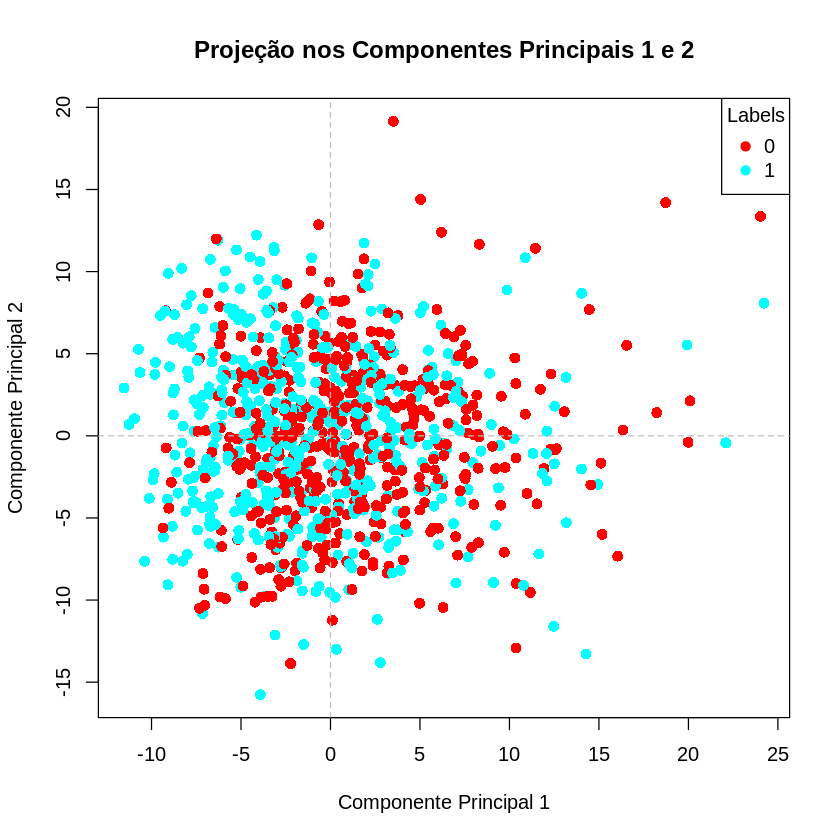

In [ ]:
plot(scores[, 1], scores[, 2],
     xlab = "Componente Principal 1",
     ylab = "Componente Principal 2",
     main = "Projeção nos Componentes Principais 1 e 2",
     pch = 16,
     cex = 1.2,col = cores_dados)
abline(h = 0, v = 0, col = "gray", lty = 2)  # Adiciona linhas no centro
legend("topright", legend = levels(labels), col = cores, pch = 19, title = "Labels")

PCoA


Se $v$ é autorvetor de $Y^{\top}Y$, $Yv$ é autovetor de $YY^{\top}$.
$$YY^{\top}(Yv)=Y(Y^{\top}Y)v=Y(\lambda)v=\lambda Yv$$

In [ ]:

dist_matrix <- dist(dados.matriz[,1:100])
pcoa_result <- cmdscale(dist_matrix, k = 2)  # k = 2 para obter as duas primeiras dimensões

# Passo 3: Plotar os resultados


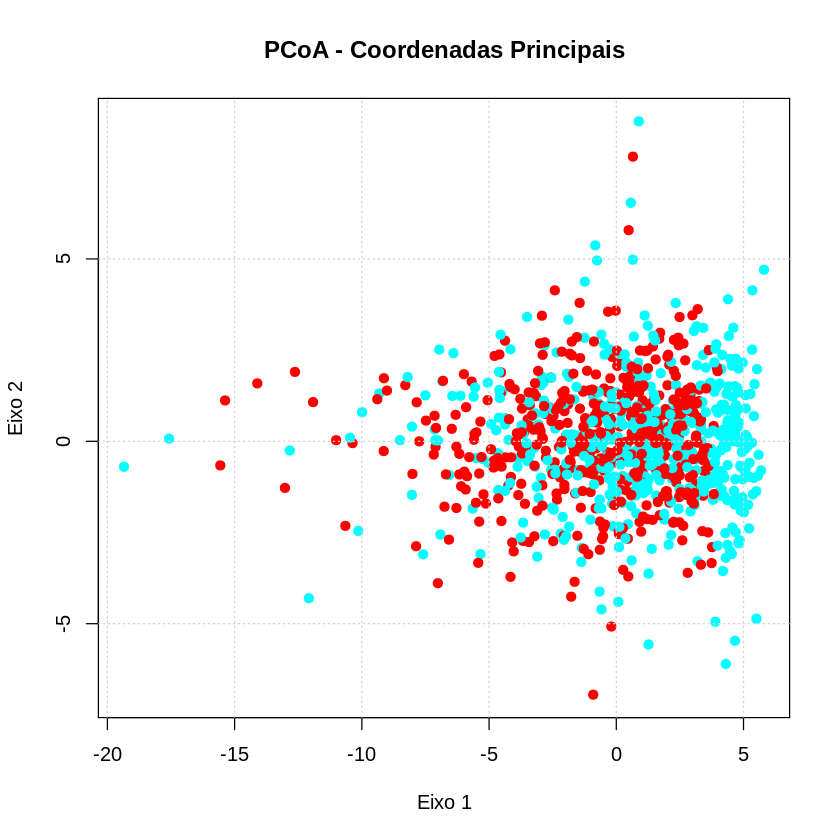

In [ ]:
plot(-pcoa_result[, 1],-pcoa_result[, 2],
     xlab = "Eixo 1",
     ylab = "Eixo 2",
     main = "PCoA - Coordenadas Principais",
     pch = 19, col = cores_dados)
grid()



In [ ]:
y_princ <- dados.matriz%*%svu$v[,1:2]
plot(-y_princ[, 1], y_princ[, 2],
     xlab = "Eixo 1",
     ylab = "Eixo 2",
     main = "PCoA - Coordenadas Principais",
     pch = 19, col = cores_dados)

ERROR: Error in dados.matriz %*% svu$v[, 1:2]: non-conformable arguments


In [ ]:
dim(svu$u)

[1] 1000 1000

In [ ]:
dim(svu$v)

[1] 12004  1000

In [ ]:
y_princ <- dados.matriz%*%svu$v[,1:2]

In [ ]:
eigen.dist <- eigen(dist(dados.matriz))

$Y = U\Lambda^{\frac{1}{2}}$<br>
Y nesse caso é a matriz de informações;


Fisher


In [ ]:
labels

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0
Levels: 0 1

In [ ]:
dim(dados.matriz)

[1]  1000 12004

In [ ]:
# Instalar pacotes necessários (se ainda não estiverem instalados)
if (!require(MASS)) install.packages("MASS")
if (!require(caret)) install.packages("caret")
library(caret)


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: caret

Loading required package: lattice



Regressão com 100

In [ ]:
library(MASS)

In [ ]:

# Dividindo os dados em treino e teste
set.seed(123)  # Para reprodutibilidade
dados_reg <- dados.matriz[,1:100]
train_index <- sample(1:nrow(dados_reg), 1 * nrow(dados_reg))  # 70% para treino
dados_treino <- dados_reg[train_index, ]
labels_treino <- labels[train_index]
dados_teste <- dados_reg[train_index, ]
labels_teste <- labels[train_index]

# Análise Discriminante Linear (LDA)
lda_model <- lda(labels ~ ., data = as.data.frame(dados_treino))
lda_pred <- predict(lda_model, newdata = as.data.frame(dados_teste))
lda_classes <- lda_pred$class  # Classes previstas

# Regressão Logística
log_model <- glm(labels_treino ~ ., data = as.data.frame(dados_treino), family = binomial)
log_prob <- predict(log_model, newdata = as.data.frame(dados_teste), type = "response")
log_classes <- ifelse(log_prob > 0.5, levels(labels_treino)[2], levels(labels_treino)[1])

# Tabela de confusão para LDA
conf_matrix_lda <- table(Predicted = lda_classes, Actual = labels_teste)
print("Tabela de Confusão - LDA:")
print(conf_matrix_lda)

# Tabela de confusão para Regressão Logística
conf_matrix_log <- table(Predicted = log_classes, Actual = labels_teste)
print("Tabela de Confusão - Regressão Logística:")
print(conf_matrix_log)

# Métricas adicionais (opcional)
# Se quiser calcular métricas como acurácia, sensibilidade, etc.

cat("Métricas para LDA:\n")
print(confusionMatrix(conf_matrix_lda))

cat("Métricas para Regressão Logística:\n")
print(confusionMatrix(conf_matrix_log))


Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


# Heatmap

In [ ]:
n_sim = 1e3

Exercício 2


In [ ]:
dados2 <- dados.matriz[,1:8]

In [ ]:
cor.matriz <- cor(dados2)

In [ ]:
cor.matriz

,DE,eQTM_DE,eQTM_DE.1,eQTM_DE.2,EE,EE.1,EE.2,EE.3
DE,1.0000000000,-0.07568571,-0.08358822,-0.07457614,0.021463546,0.008475160,-0.0006005185,0.007063348
eQTM_DE,-0.0756857107,1.00000000,0.78597032,0.78801289,0.071634142,0.014815320,0.0640325105,0.010316913
eQTM_DE.1,-0.0835882205,0.78597032,1.00000000,0.80051840,0.053073774,-0.026134685,0.0528877626,-0.023639938
eQTM_DE.2,-0.0745761413,0.78801289,0.80051840,1.00000000,0.043517969,-0.004854530,0.0595795023,0.021155603
EE,0.0214635458,0.07163414,0.05307377,0.04351797,1.000000000,0.003327553,0.0384780101,0.019036907
EE.1,0.0084751602,0.01481532,-0.02613468,-0.00485453,0.003327553,1.000000000,0.0089388092,0.025107107
EE.2,-0.0006005185,0.06403251,0.05288776,0.05957950,0.038478010,0.008938809,1.0000000000,0.029068476
EE.3,0.0070633484,0.01031691,-0.02363994,0.02115560,0.019036907,0.025107107,0.0290684763,1.000000000


In [ ]:
solve(cor.matriz)

,DE,eQTM_DE,eQTM_DE.1,eQTM_DE.2,EE,EE.1,EE.2,EE.3
DE,1.008158467,0.02484722,0.056661832,0.011692703,-0.026674351,-0.007117345,-0.003429130,-0.005499032
eQTM_DE,0.024847220,3.22562221,-1.395453954,-1.416040180,-0.093363032,-0.089864272,-0.043057720,-0.031200031
eQTM_DE.1,0.056661832,-1.39545395,3.411876212,-1.629112871,-0.014258079,0.098298124,0.001985902,0.126863683
eQTM_DE.2,0.011692703,-1.41604018,-1.629112871,3.422623485,0.041541257,-0.002568747,-0.025852631,-0.096368045
EE,-0.026674351,-0.09336303,-0.014258079,0.041541257,1.007868616,-0.001153724,-0.033999119,-0.018233694
EE.1,-0.007117345,-0.08986427,0.098298124,-0.002568747,-0.001153724,1.004562901,-0.007602411,-0.021623215
EE.2,-0.003429130,-0.04305772,0.001985902,-0.025852631,-0.033999119,-0.007602411,1.006361576,-0.027352967
EE.3,-0.005499032,-0.03120003,0.126863683,-0.096368045,-0.018233694,-0.021623215,-0.027352967,1.007083622


In [ ]:
data <- data.frame(dados2, labels = labels)

In [ ]:
data$labels = as.factor(data$labels)

In [ ]:
model <- lm(DE ~ eQTM_DE + eQTM_DE.1 + eQTM_DE.2, data = data)

  # Extração de R² e cálculo de R (correlação múltipla)
r_squared <- summary(model)$r.squared
r <- sqrt(r_squared)
print(r)
summary(model)

[1] 0.08538172



Call:
lm(formula = DE ~ eQTM_DE + eQTM_DE.1 + eQTM_DE.2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9208 -1.0272 -0.2673  0.7603  8.7157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92840    0.04967  18.689   <2e-16 ***
eQTM_DE     -0.01312    0.03506  -0.374    0.708    
eQTM_DE.1   -0.03694    0.03739  -0.988    0.323    
eQTM_DE.2   -0.00735    0.03577  -0.205    0.837    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.377 on 996 degrees of freedom
Multiple R-squared:  0.00729,	Adjusted R-squared:  0.0043 
F-statistic: 2.438 on 3 and 996 DF,  p-value: 0.06318


In [ ]:
model <- lm(DE ~ EE + EE.1 + EE.2 + EE.3, data = data)

  # Extração de R² e cálculo de R (correlação múltipla)
r_squared <- summary(model)$r.squared
r <- sqrt(r_squared)
print(r)
summary(model)

[1] 0.02399401



Call:
lm(formula = DE ~ EE + EE.1 + EE.2 + EE.3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8733 -1.0646 -0.2656  0.7243  8.5806 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.870055   0.046239  18.817   <2e-16 ***
EE           0.029773   0.044180   0.674    0.501    
EE.1         0.012642   0.048547   0.260    0.795    
EE.2        -0.002296   0.043218  -0.053    0.958    
EE.3         0.008963   0.043753   0.205    0.838    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.382 on 995 degrees of freedom
Multiple R-squared:  0.0005757,	Adjusted R-squared:  -0.003442 
F-statistic: 0.1433 on 4 and 995 DF,  p-value: 0.966


In [ ]:
model <- lm(eQTM_DE ~ eQTM_DE.1 +eQTM_DE.2, data = data)

  # Extração de R² e cálculo de R (correlação múltipla)
r_squared <- summary(model)$r.squared
r <- sqrt(r_squared)
print(r)
summary(model)

[1] 0.8294489



Call:
lm(formula = eQTM_DE ~ eQTM_DE.1 + eQTM_DE.2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6144 -0.8837 -0.1533  0.7498  6.6352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08682    0.04480   1.938   0.0529 .  
eQTM_DE.1    0.44848    0.03065  14.634   <2e-16 ***
eQTM_DE.2    0.43745    0.02920  14.981   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.244 on 997 degrees of freedom
Multiple R-squared:  0.688,	Adjusted R-squared:  0.6874 
F-statistic:  1099 on 2 and 997 DF,  p-value: < 2.2e-16


In [ ]:
model <- lm(eQTM_DE ~ EE + EE.1 + EE.2 + EE.3, data = data)
r_squared <- summary(model)$r.squared
r <- sqrt(r_squared)
print(r)
summary(model)


[1] 0.09558269



Call:
lm(formula = eQTM_DE ~ EE + EE.1 + EE.2 + EE.3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7751 -1.6430 -0.2583  1.3117 10.0713 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.11501    0.07423  15.021   <2e-16 ***
EE           0.15518    0.07093   2.188   0.0289 *  
EE.1         0.03424    0.07794   0.439   0.6606    
EE.2         0.13407    0.06938   1.932   0.0536 .  
EE.3         0.01530    0.07024   0.218   0.8276    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.218 on 995 degrees of freedom
Multiple R-squared:  0.009136,	Adjusted R-squared:  0.005153 
F-statistic: 2.294 on 4 and 995 DF,  p-value: 0.05766


In [ ]:
model <- lm(EE ~  EE.1 + EE.2 + EE.3, data = data)
r_squared <- summary(model)$r.squared
r <- sqrt(r_squared)
print(r)
summary(model)

[1] 0.04252463



Call:
lm(formula = EE ~ EE.1 + EE.2 + EE.3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1421 -0.7119 -0.0919  0.6344  3.9101 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.041042   0.033137  -1.239    0.216
EE.1         0.002792   0.034819   0.080    0.936
EE.2         0.037100   0.030974   1.198    0.231
EE.3         0.017698   0.031376   0.564    0.573

Residual standard error: 0.9911 on 996 degrees of freedom
Multiple R-squared:  0.001808,	Adjusted R-squared:  -0.001198 
F-statistic: 0.6015 on 3 and 996 DF,  p-value: 0.6141
